In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

datas = load_digits()
X = datas.data
y = datas.target
clf = MultinomialNB()
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0) 

learning_curve(clf, X, y, cv=cv, n_jobs=4)

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=cv, n_jobs=3)

train_sizes

train_scores.shape  # (5, 50)

test_scores.shape  # (5, 50)

(5, 30)

In [7]:
def plot_learning_curve(estimator, title, X, y, ax, ylim=None, cv=None, n_jobs=None):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:  
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples", fontsize=20)
    ax.set_ylabel("Score", fontsize=20)
    ax.title(fontsize=30)
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score") 
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Test score") 
    ax.legend(loc="best", fontsize=20)
    return ax

TypeError: 'Text' object is not callable

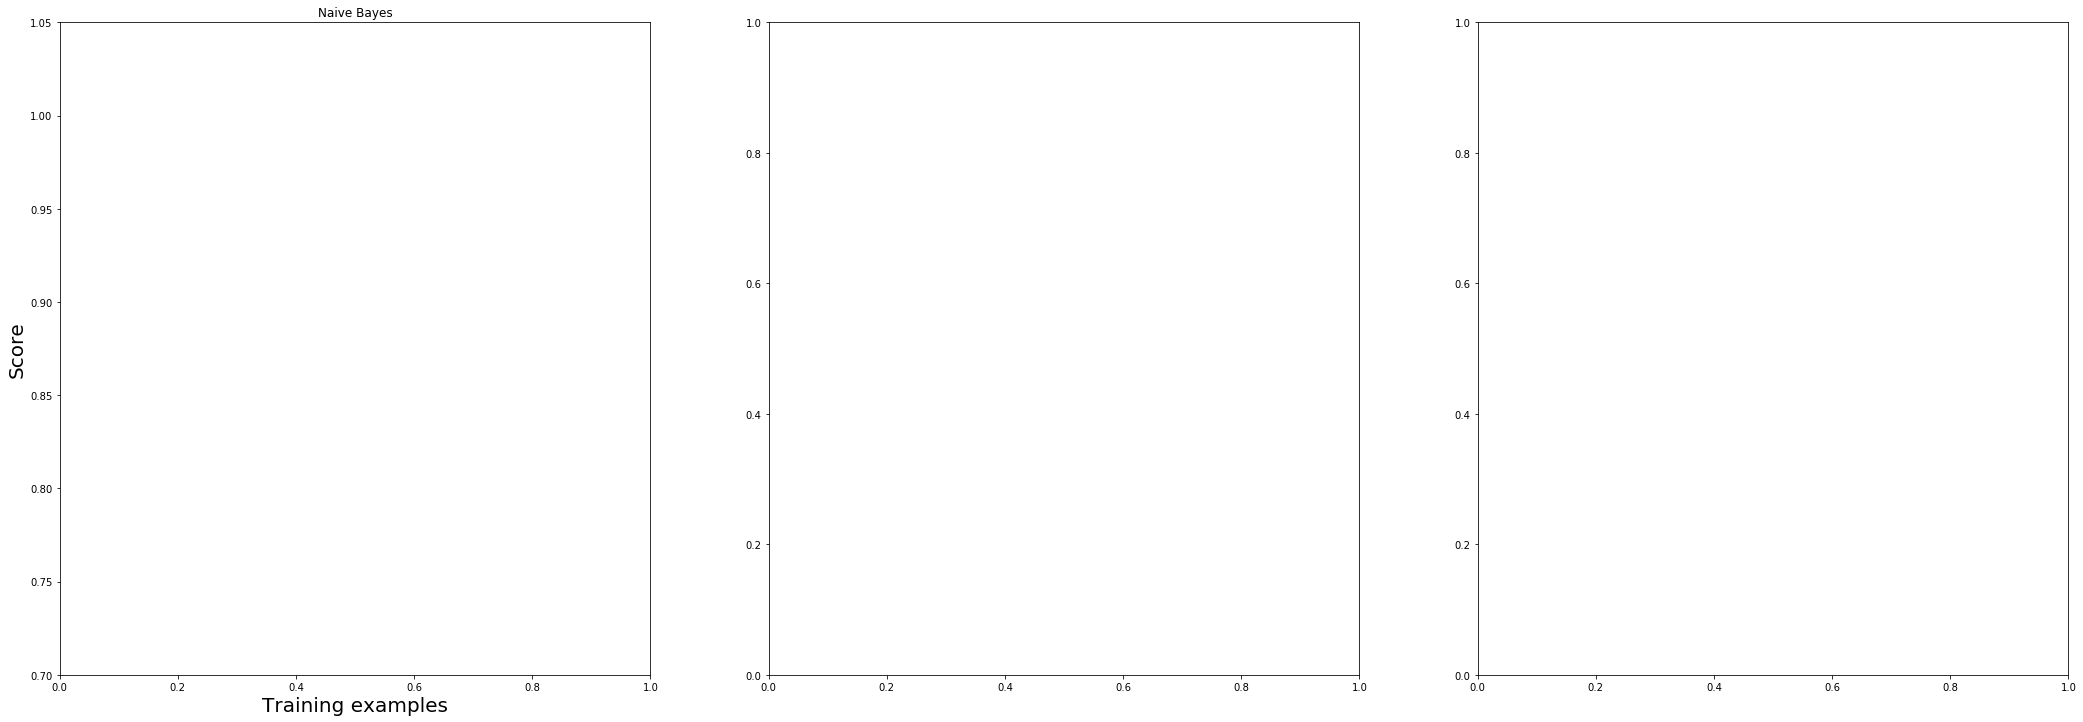

In [8]:
title = ["Naive Bayes","SVM, RBF kernel","Logistic"]

model = [MultinomialNB(),SVC(gamma=0.001),LR(C=.1,solver="lbfgs")]
fig, axes = plt.subplots(1,3,figsize=(36,12))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y, ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()